<a href="https://colab.research.google.com/github/gigikenneth/nmt/blob/master/netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataquest Beginner Python Tutorial: Analyze Your Personal Netflix Data](http://links.iterable.com/u/click?_t=4a16705ff7784260b1b139ad7ac93ebf&_m=efba214df7b74adc84ef7f5b922b6d06&_e=8TJ4DQoJvJqLtEBqLNPGdXLvsMnAG4PY2eb11c8xjkGEXW7C4nB8vjMcmh_nR0ZxJzBj7XV4EBXJChUdw-j-ejYEOaJxlWX-SSGGC_VcH3eHAhqYeHkKO_9rQ0UGeO1hp6Wqal9DD9Pf33L48RcmX-NEgEic6DQ1ctLSXmC94Kiv0ZOPu2ajqyrHcZEg26yX0ZnRE0c2VgwJeG3v7j9hM5DXUZBL8WpIub1s9DHgKEpA1ZWGaKOHysTVBVznyfBadY-Rk5HrmAy-gbAqGHg1UFaL2rC3GKNmZ3xlOiRn-Y6veJQOsyMWwOcIN7lFIzs7Qm_RwGwjyMgHy2V6Zeb4-OD1l7PISv4Pxud1hiCTEvYGUcNYy3fYZw_56mWcAPxbMOAhQF9IZOUfcttZcovpiw%3D%3D)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.head(4)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Chigoziem,2021-12-25 09:08:44,00:34:36,NaN,Three Thieves,NaN,Android DefaultWidevineL3Phone Android Phone,00:59:51,00:59:51,NG (Nigeria)
1,Chigoziem,2021-12-25 01:05:47,00:00:50,NaN,Season 1 & 2 Trailer: Cobra Kai,TRAILER,Android DefaultWidevineL3Phone Android Phone,00:00:50,00:00:50,NG (Nigeria)
2,Chigoziem,2021-12-24 15:32:30,01:22:28,NaN,Sidechic Gang,NaN,Android DefaultWidevineL3Phone Android Phone,01:27:29,01:27:29,NG (Nigeria)
3,Chigoziem,2021-12-24 08:23:18,01:29:33,NaN,Three Thieves,NaN,Android DefaultWidevineL3Phone Android Phone,01:47:36,Not latest view,NG (Nigeria)


In [4]:
df.describe()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
count,7734,7734,7734,865,7734,2078,7734,7734,7734,7734
unique,5,7726,2589,3,3318,6,11,3101,1617,6
top,Gigi,2021-11-08 17:15:57,00:00:04,Autoplayed: user action: None;,The Princess Switch 3: Romancing the Star,HOOK,Android DefaultWidevineL3Phone Android Phone,00:00:04,Not latest view,NG (Nigeria)
freq,3652,2,213,809,36,1302,4192,173,3931,7252


dropping columns I don't think I need

In [5]:
df1 = df.drop(['Supplemental Video Type', 'Attributes', 'Bookmark', 'Latest Bookmark'], axis=1)

In [6]:
df1.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Chigoziem,2021-12-25 09:08:44,00:34:36,Three Thieves,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
1,Chigoziem,2021-12-25 01:05:47,00:00:50,Season 1 & 2 Trailer: Cobra Kai,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
2,Chigoziem,2021-12-24 15:32:30,01:22:28,Sidechic Gang,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
3,Chigoziem,2021-12-24 08:23:18,01:29:33,Three Thieves,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
4,Chigoziem,2021-12-24 00:32:22,00:40:15,God Calling,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)


convert strings to datetime and timedelta in pandas

In [7]:
df1.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
Country         object
dtype: object

In [8]:
#convvert start time to datetime

df1['Start Time'] = pd.to_datetime(df1['Start Time'], utc=True)
df1.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
Country                      object
dtype: object

In [9]:
#df1.set_index('Start Time', drop=False, inplace=True)

In [ ]:
#df1.index = df1.index.tz.localize('UTC').tz_convert('Africa/Lagos')

In [10]:
#df1.index  = df1.index.tz_convert('Africa/Lagos')

In [9]:
df1.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Chigoziem,2021-12-25 09:08:44+00:00,00:34:36,Three Thieves,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
1,Chigoziem,2021-12-25 01:05:47+00:00,00:00:50,Season 1 & 2 Trailer: Cobra Kai,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
2,Chigoziem,2021-12-24 15:32:30+00:00,01:22:28,Sidechic Gang,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
3,Chigoziem,2021-12-24 08:23:18+00:00,01:29:33,Three Thieves,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
4,Chigoziem,2021-12-24 00:32:22+00:00,00:40:15,God Calling,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)


In [10]:
#converting duration to a timedelta

df1['Duration'] = pd.to_timedelta(df1['Duration'])

df1.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration            timedelta64[ns]
Title                        object
Device Type                  object
Country                      object
dtype: object

In [11]:
# reset the index so that Start Time becomes a column again
# df1 = df1.reset_index()#double-check that it worked
# df1.head(1)

In [ ]:
#convert duration to timedelta

filtering 'Squid Game' using str.contains()

In [12]:
# create a new dataframe called squid that that takes from df
# only the rows in which the Title column contains 'Squid Game'

squid =  df1[df1['Title'].str.contains('Squid Game', regex=False)]

In [13]:
squid.describe()

,Duration
count,182
mean,0 days 00:18:05.302197802
std,0 days 00:18:49.432914907
min,0 days 00:00:01
25%,0 days 00:00:55.250000
50%,0 days 00:12:35.500000
75%,0 days 00:29:19.500000
max,0 days 01:00:45


In [14]:
squid.shape

(182, 6)

In [15]:
import matplotlib as plt

In [16]:
squid = squid[(squid['Duration'] > '0 days 00:01:00')]

In [17]:
squid.shape

(136, 6)

In [18]:
squid['Duration'].sum()

Timedelta('2 days 06:41:26')

when did i watch squid game

In [24]:
squid['weekday'] = squid['Start Time'].dt.weekday
#.dt.weekdaysquid['hour'] = squid['Start Time'].dt.hour


In [25]:
squid['hour'] = squid['Start Time'].dt.hour
#squid.head(1)

In [31]:
squid.head(1)

,Profile Name,Start Time,Duration,Title,Device Type,Country,weekday,hour
1289,Chigoziem,2021-10-20 12:40:08+00:00,0 days 00:03:42,"Squid Game: Season 1: Red Light, Green Light (...",Android DefaultWidevineL3Phone Android Phone,NG (Nigeria),2,12


In [33]:
import matplotlib as plt

In [36]:
#set our categorical and define the order so the days are plotted Monday-Sunday
squid['weekday'] = pd.Categorical(squid['weekday'], categories = [0,1,2,3,4,5,6], ordered=True)

In [37]:
squid_day_by_day = squid['weekday'].value_counts()

In [38]:
#sort the index using our categorical
squid_day_by_day = squid_day_by_day.sort_index()

In [41]:
#plt.rcParams.uodate({'font.size':22})

AttributeError: ignored

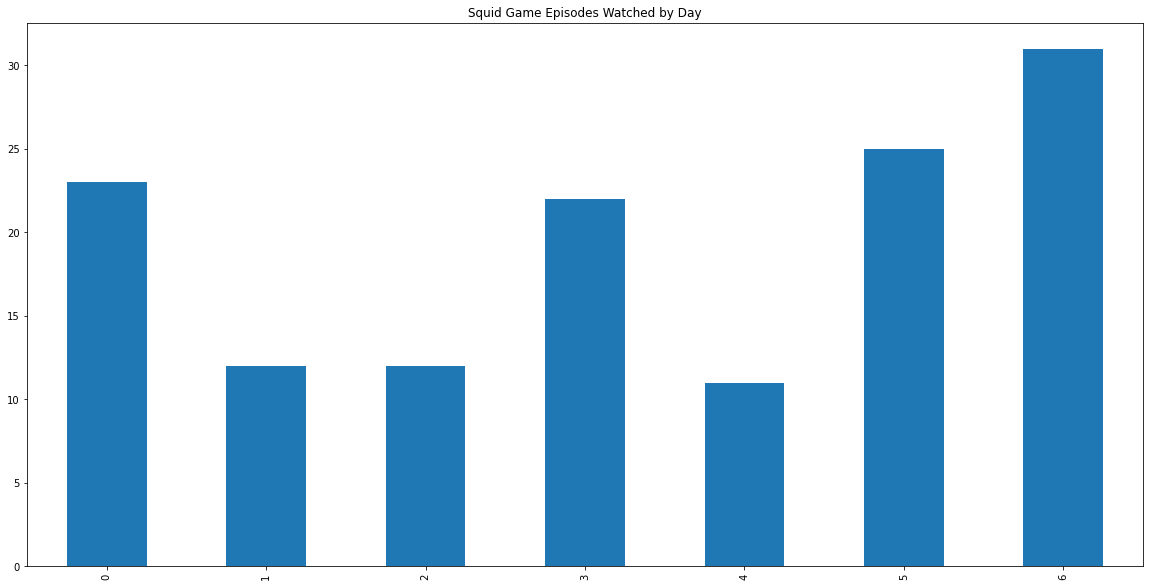

In [43]:
squid_day_by_day.plot(kind='bar', figsize=(20,10), title='Squid Game Episodes Watched by Day')

In [44]:
#by hour

squid['hour'] = pd.Categorical(squid['hour'], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [46]:
squid_by_hour = squid['hour'].value_counts()

In [47]:
squid_by_hour = squid_by_hour.sort_index()

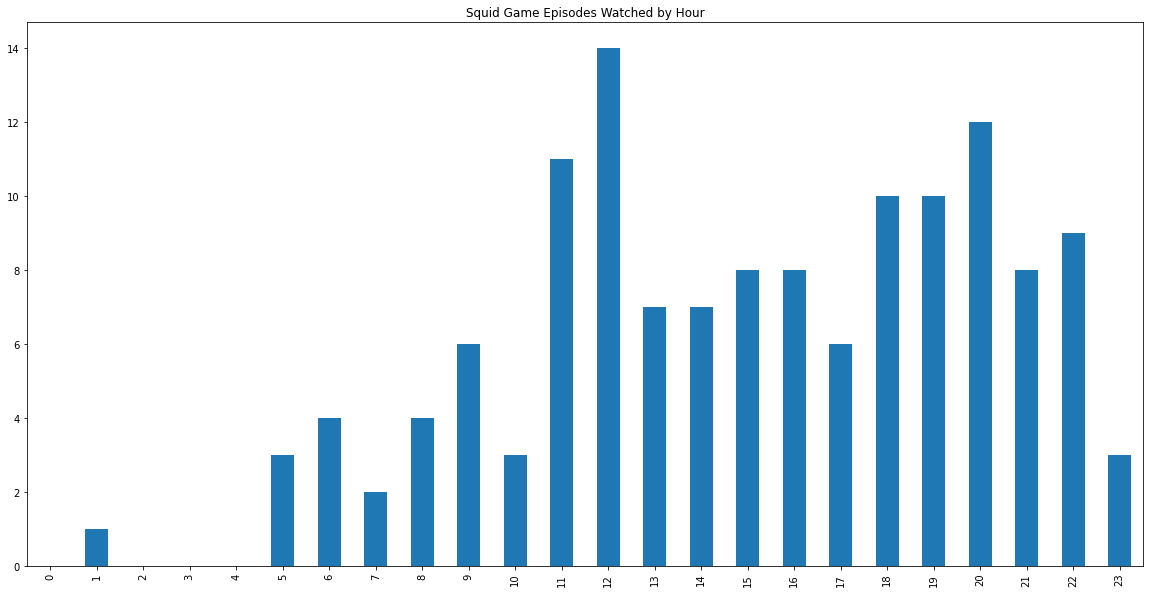

In [48]:
squid_by_hour.plot(kind='bar', figsize=(20,10), title='Squid Game Episodes Watched by Hour')